# Subject: Data Science Foundation

## Session 9 - Data Exploration and Imputation

### Exercise 1 -  Data Exploration and Imputation for pandas Dataframe "Bike sharing"


## 1. Import the data set "Bike sharing"

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("/Users/racheldyap/Desktop/DataScienceFoundations/Session_9/FileData/2_bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
df.shape

(10886, 12)

In [3]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10289.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.357901,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.617266,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 2. Are there NA Values, Outliers or Other Strange Values? Explore the variable "temp".

In [5]:
df.shape

(10886, 12)

In [6]:
missing = np.where(df["temp"].isnull()== True)
len(missing[0])

597

In [7]:
df.isnull().sum()

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp          597
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
dtype: int64

In [8]:
len(df)-df.count()

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp          597
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
dtype: int64

In [9]:
del df["atemp"]
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,75,0.0,0,1,1


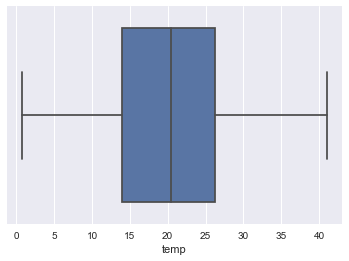

In [10]:
sns.boxplot(x=df["temp"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11121ed68>]], dtype=object)

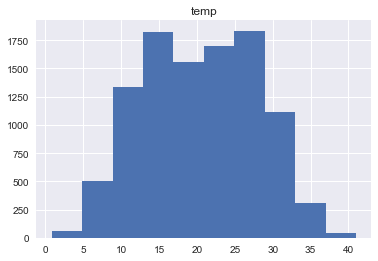

In [11]:
df.hist('temp', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114e9e1d0>]], dtype=object)

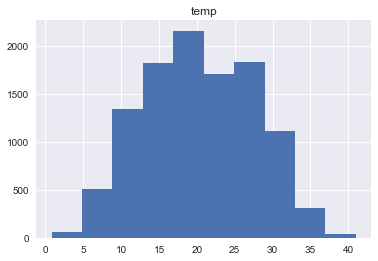

In [12]:
new_temp = np.where(df['temp'].isnull(), df['temp'].median(), df['temp'])
df['temp']= new_temp

df.hist('temp', bins=10)

In [14]:
df["temp"].describe()

count    10886.000000
mean        20.365694
std          7.405502
min          0.820000
25%         14.760000
50%         20.500000
75%         26.240000
max         41.000000
Name: temp, dtype: float64

In [16]:
# rename season
# season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

In [17]:
new_season = pd.Categorical(df['season'])
new_season = new_season.rename_categories(["Spring", 'Summer', "Fall", "Winter"])
new_season.describe()

,counts,freqs
categories,,
Spring,2686,0.246739
Summer,2733,0.251056
Fall,2733,0.251056
Winter,2734,0.251148
